**CHEM E 545 Midterm Exam** Please put team name in the submisson (.ipynb file). Run your notebook so that your outputs are visible and comment throughout your code. **(80 points)**

In this project, you will develop a supervised machine learning model to predict the Gibbs free energy of solvation (ΔG).  ΔG is a crucial property for modeling various chemical processes, including electrochemistry and drug delivery systems.  While traditional methods like quantum mechanics and molecular dynamics have been used extensively for predicting ΔG, machine learning has recently emerged as a popular alternative.  By establishing relationships between molecular structure and activity, machine learning models can effectively predict thermodynamic properties.  Your focus will be on building generalizable machine learning models for ΔG prediction.  Furthermore, you will perform feature selection to identify the most influential molecular descriptors.

**Question 1** Begin by loading the data and separating it into features (X) and target variable (y).  Handle any missing values by replacing them with zero.  Next, preprocess the data in preparation for machine learning.  Briefly explain the chosen preprocessing method and the rationale behind its selection.  Use a random state of 42 for any processes requiring randomization. **(10 points)**

# Load and explore df

In [4]:
import pandas as pd
df = pd.read_csv('Gibbs_predictor_545_data_final_2.csv')

In [5]:
# 214 columns! including the target column 'gibbs_free_energy'
df.columns

Index(['Solvent_Type', 'gibbs_free_energy', 'solvent_topo_mol_connectivity',
       'solvent_mol_complexity', 'connectivity_index_order0',
       'connectivity_index_order0n', 'connectivity_index_order0v',
       'connectivity_index_order1', 'connectivity_index_order1n',
       'connectivity_index_order1v',
       ...
       'eState_and_area_index1_solute_', 'eState_and_area_index10_solute_',
       'eState_and_area_index2_solute_', 'eState_and_area_index3_solute_',
       'eState_and_area_index4_solute_', 'eState_and_area_index5_solute_',
       'eState_and_area_index6_solute_', 'eState_and_area_index7_solute_',
       'eState_and_area_index8_solute_', 'eState_and_area_index9_solute_'],
      dtype='object', length=214)

In [6]:
# how many columns are non-numeric?
df.select_dtypes(exclude='number').columns

Index(['Solvent_Type'], dtype='object')

In [7]:
# count number of nan
df.isna().sum().sum() #isna and isnull do the same thing

np.int64(156)

In [8]:
df[df.columns[0]].info() #info of just the first column

<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: Solvent_Type
Non-Null Count  Dtype 
--------------  ----- 
6239 non-null   object
dtypes: object(1)
memory usage: 48.9+ KB


In [10]:
df[df.columns[0]].isna().sum()

np.int64(0)

In [9]:
df[df.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239 entries, 0 to 6238
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Solvent_Type                   6239 non-null   object 
 1   gibbs_free_energy              6239 non-null   float64
 2   solvent_topo_mol_connectivity  6239 non-null   float64
 3   solvent_mol_complexity         6239 non-null   float64
 4   connectivity_index_order0      6239 non-null   float64
 5   connectivity_index_order0n     6239 non-null   float64
 6   connectivity_index_order0v     6239 non-null   float64
 7   connectivity_index_order1      6239 non-null   float64
 8   connectivity_index_order1n     6239 non-null   float64
 9   connectivity_index_order1v     6239 non-null   float64
dtypes: float64(9), object(1)
memory usage: 487.6+ KB


In [10]:
df[df.columns[df.dtypes == 'object']].value_counts()  # See distribution

Solvent_Type                   
Organic oxygen compounds           1460
Hydrocarbons                       1127
Organic acids and derivatives       804
Benzenoids & Organo-N-S comp        775
Water                               642
Organohalogen compounds             631
Organoheterocyclic compounds        576
Lipids and lipid-like molecules     224
Name: count, dtype: int64

In [11]:
# let's find what column(s) those nan are in
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(df[col].info())

<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: solute_max_abs_partial_charge
Non-Null Count  Dtype  
--------------  -----  
6200 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: solute_max_partial_charge
Non-Null Count  Dtype  
--------------  -----  
6200 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: solute_min_abs_part_charge
Non-Null Count  Dtype  
--------------  -----  
6200 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 6239 entries, 0 to 6238
Series name: solute_min_charge
Non-Null Count  Dtype  
--------------  -----  
6200 non-null   float64
dtypes: float64(1)
memory usage: 48.9 KB
None


In [12]:
# ALL the columns with Nan are related to solute charge
systematic_missing = df[df['solute_min_charge'].isna()][['solute_min_charge',
                                 'solute_min_abs_part_charge',
                                 'solute_max_partial_charge',
                                 'solute_max_abs_partial_charge']]

In [13]:
systematic_missing

,solute_min_charge,solute_min_abs_part_charge,solute_max_partial_charge,solute_max_abs_partial_charge
172,NaN,NaN,NaN,NaN
377,NaN,NaN,NaN,NaN
596,NaN,NaN,NaN,NaN
1008,NaN,NaN,NaN,NaN
1061,NaN,NaN,NaN,NaN
1146,NaN,NaN,NaN,NaN
1258,NaN,NaN,NaN,NaN
1265,NaN,NaN,NaN,NaN
1322,NaN,NaN,NaN,NaN
1686,NaN,NaN,NaN,NaN


In [14]:
systematic_missing.shape

(39, 4)

In [15]:
# So if a row is Nan in one of those columns it is nan in ALL of those columns
156/39

4.0

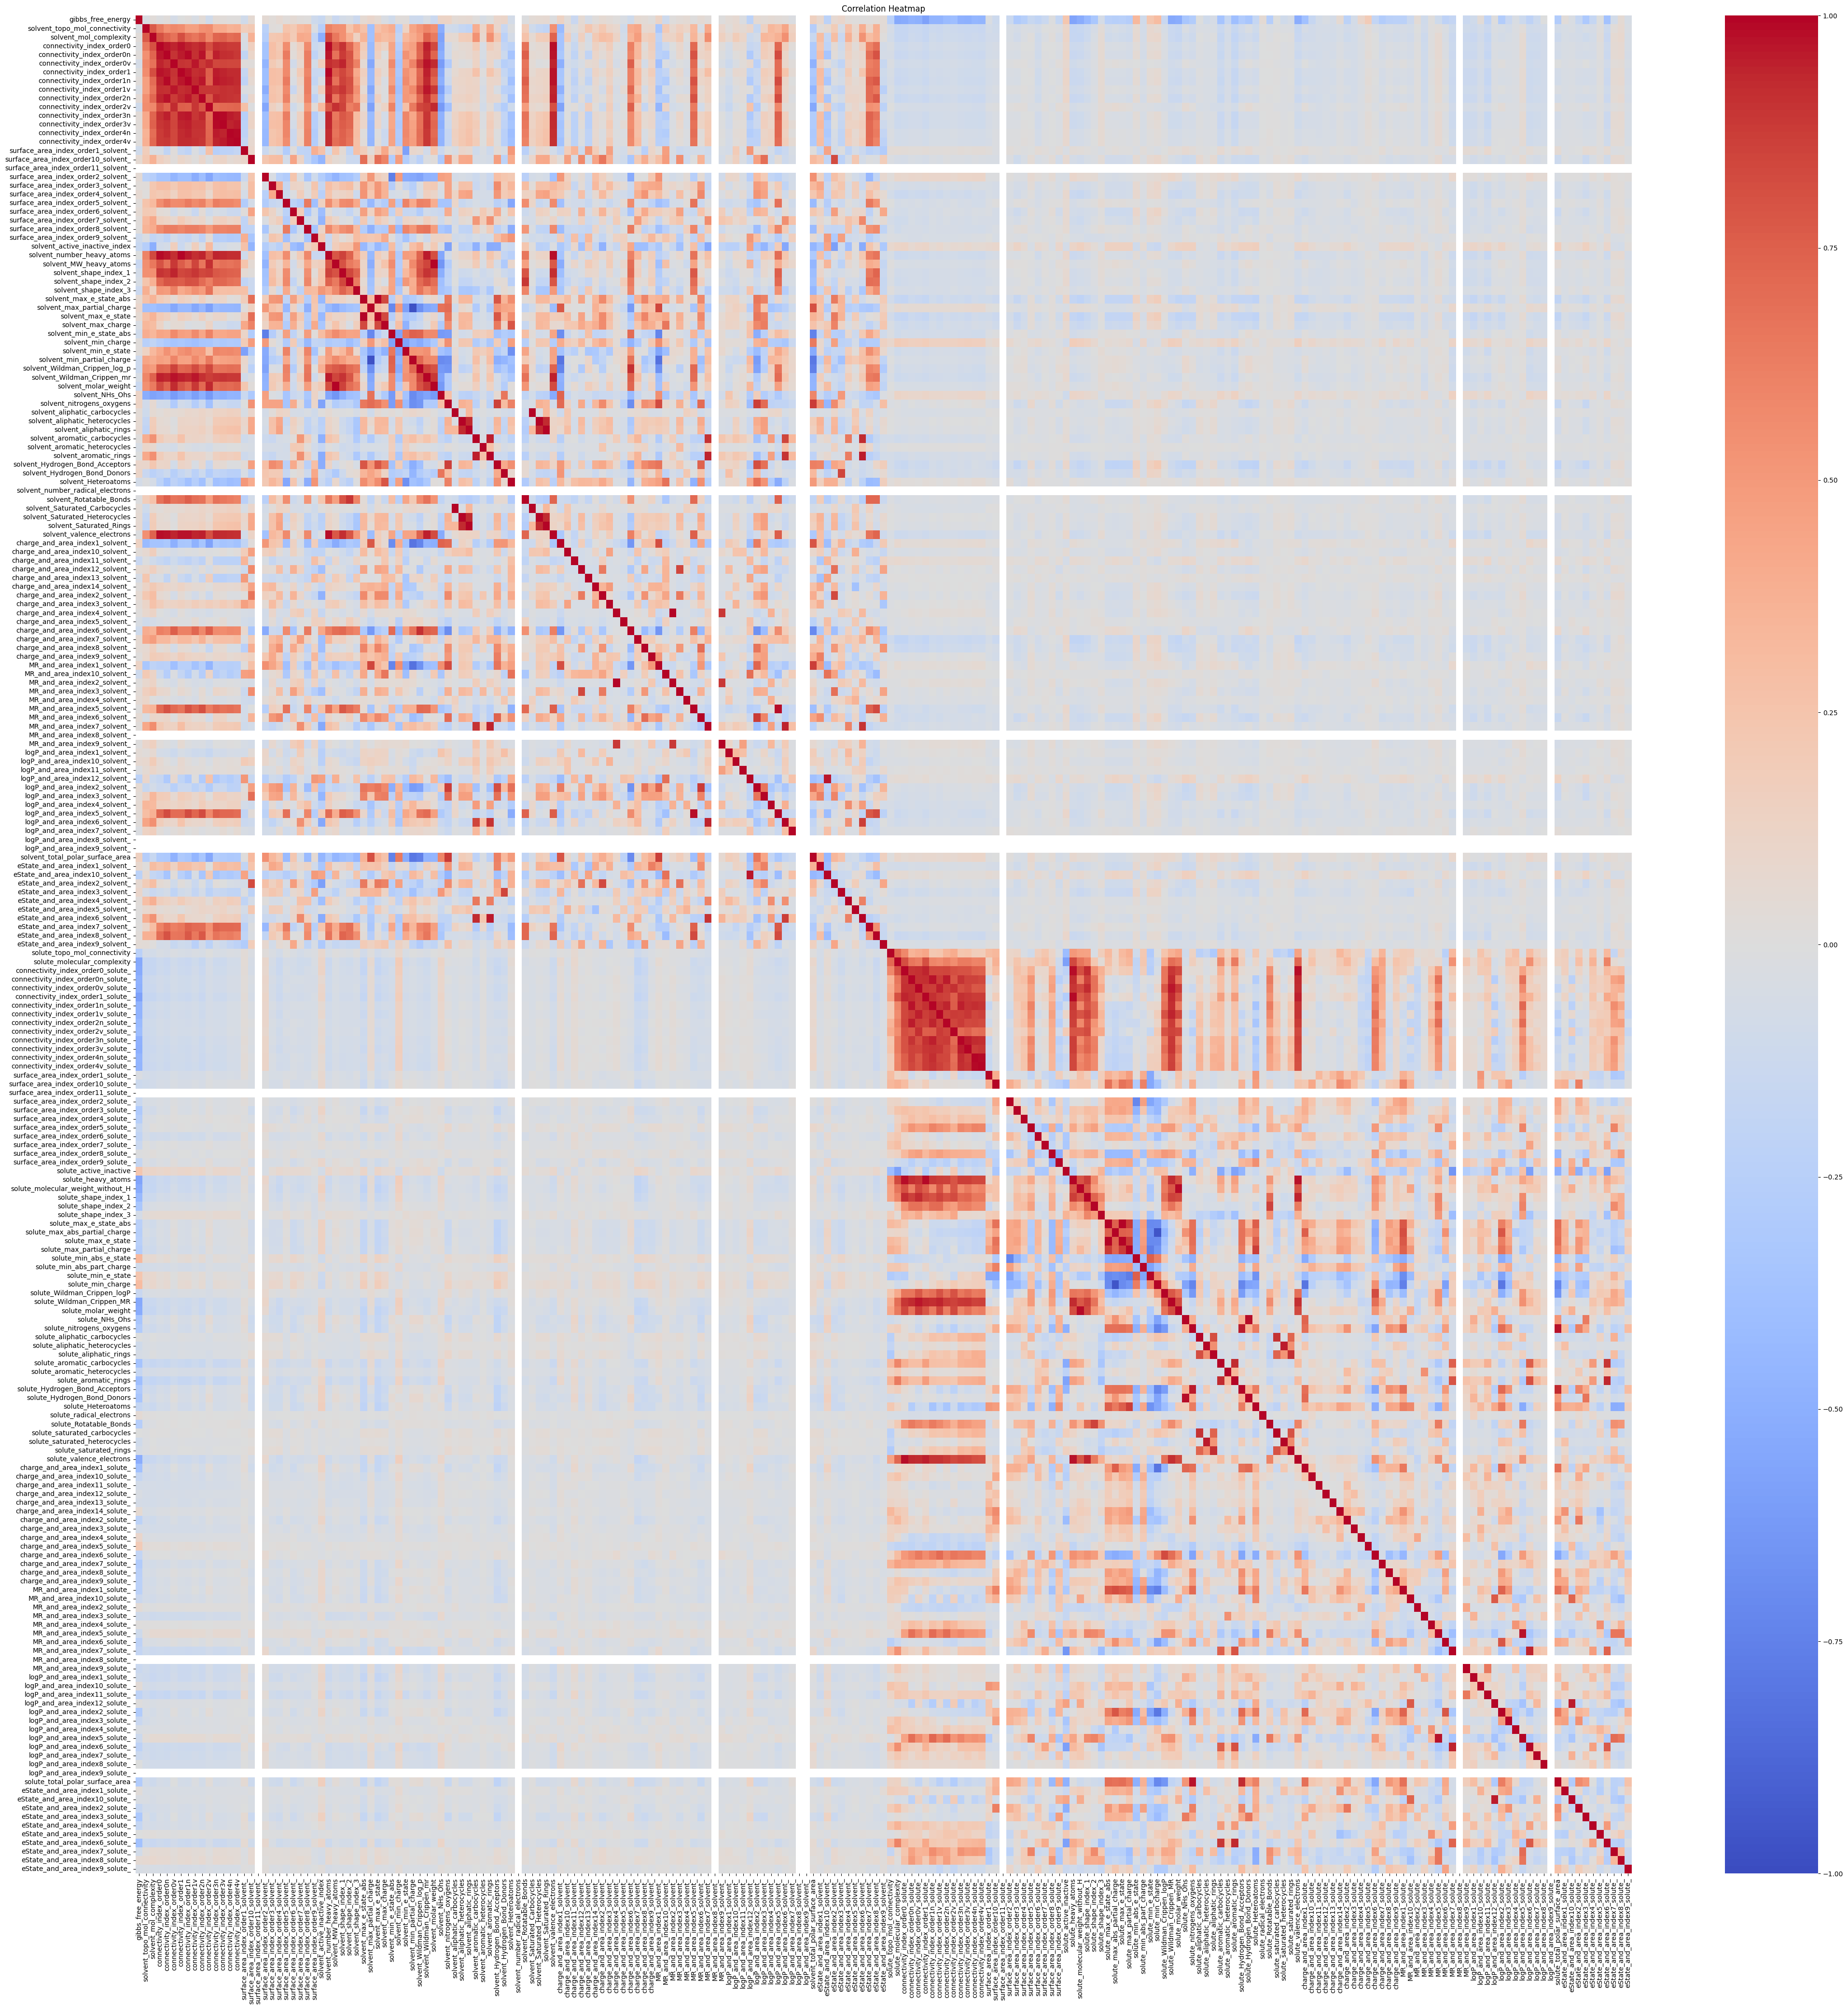

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a correlation matrix to quickly see how column are related
# use spearman rank correlation (non parametric)
corr_matrix = df.fillna(0)[df.columns[1:]].corr(method='spearman')

# Visualize the corr matrix as a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, vmax=1, vmin=-1)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Why are there blank lines in the corr matrix?
# It's because some columns contain ONLY ZEROES!!!
# For example look at the column below
df.solvent_number_radical_electrons.describe()

count    6239.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: solvent_number_radical_electrons, dtype: float64

In [19]:
df['solvent_number_radical_electrons'].describe()

count    6239.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: solvent_number_radical_electrons, dtype: float64

In [20]:
# Another all zero column
df['logP_and_area_index9_solute_'].describe()

count    6239.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: logP_and_area_index9_solute_, dtype: float64

# - Fill missing values with 0
# - Drop any duplicate rows
# - Removing columns that had 0 in all observations
# - Checking outliers

In [25]:
# replace all the nan with 0
df_fillna = df.fillna(0)
df_fillna.drop_duplicates(inplace=True) #dropping ROWS

In [26]:
df_fillna.isna().sum().sum()

np.int64(0)

In [27]:
df_fillna.shape

(6238, 214)

In [63]:
col_w_all_zeros = []
for col in df_fillna.columns[1:]:
    if ((df_fillna[col])**2).sum() == 0:
        df_fillna.drop(col, axis =1, inplace=True)
        col_w_all_zeros.append(col)
    else:
        pass
print(f'Removed {len(col_w_all_zeros)} columns with all zeros.')

Removed 8 columns with all zeros.


In [64]:
# eyeballing some of the columns I can see that some are skewed, mean != median
# for ex. if mean > median then the distribution is right skewed
# and there are outliers greater than 3 std away from mean, look at solvent_mol_complexity for ex
df_fillna.describe()

,gibbs_free_energy,solvent_topo_mol_connectivity,solvent_mol_complexity,connectivity_index_order0,connectivity_index_order0n,connectivity_index_order0v,connectivity_index_order1,connectivity_index_order1n,connectivity_index_order1v,connectivity_index_order2n,...,eState_and_area_index1_solute_,eState_and_area_index10_solute_,eState_and_area_index2_solute_,eState_and_area_index3_solute_,eState_and_area_index4_solute_,eState_and_area_index5_solute_,eState_and_area_index6_solute_,eState_and_area_index7_solute_,eState_and_area_index8_solute_,eState_and_area_index9_solute_
count,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,...,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000
mean,-3.831407,2.349395,50.712386,5.112911,4.453125,4.752397,3.106873,2.493866,2.691991,1.603970,...,2.352565,1.383652,2.125574,1.781543,0.326270,0.141656,1.453376,1.942471,2.938981,0.080912
std,2.278725,0.908214,52.074926,2.960398,2.926040,2.827085,2.019476,1.998428,1.962207,1.360250,...,8.166722,4.231572,4.507584,3.719038,1.161216,0.742350,3.455220,3.291583,2.727144,1.106910
min,-25.470000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,...,-3.699074,-0.750000,-3.555556,-9.316358,-4.527778,-23.875000,-0.425926,-16.434028,-3.743519,-10.472222
25%,-4.952350,2.190610,11.119415,3.577350,2.308641,3.333965,1.914214,1.034522,1.523335,0.447214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.925674,2.595083,29.193808,4.991564,3.976782,4.386751,2.914214,2.100685,2.379177,1.410684,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,2.360278,0.000000
75%,-2.728578,2.847379,88.935697,5.983128,5.437817,5.535534,3.804530,3.070004,3.414214,2.154701,...,0.000000,0.000000,0.000000,0.194444,0.000000,0.000000,0.000000,2.935926,4.491389,0.000000
max,3.430000,3.998983,341.098159,13.313709,12.118275,12.338595,8.914214,7.914214,8.178236,5.242641,...,92.875000,60.858419,35.906250,52.176914,13.356975,8.000000,21.857963,38.391426,12.586806,8.222222


In [65]:
df_fillna.select_dtypes(exclude='number').columns

Index(['Solvent_Type'], dtype='object')

In [66]:
counter = 0 
for col in df_fillna.columns[1:]:
    mean = df_fillna[col].mean()
    std = df_fillna[col].std()
    absol = df_fillna[col]
#print(absol)
    if (abs(df_fillna[col] - mean) > (3*std)).sum() > 0:
        #print(col)
        counter += 1
    else:
        pass
print(f'Total number of columns with outliers = {counter}')

Total number of columns with outliers = 171


In [67]:
# let's see how many columns have outliers, we'll define that as greater than 3 standard deviations
# exclude the first column, bc that's the categorical column solvent_type

col_w_outliers = []

for col in df_fillna.columns[1:]:
    mean = df_fillna[col].mean()
    std = df_fillna[col].std()
    if (abs(df_fillna[col] - mean) > (3 * std)).sum() > 0:
        col_w_outliers.append(col)

In [68]:
col_w_outliers
len(col_w_outliers)

171

# - Dummy Encode the Solvent Type
# - Define X and y 

In [69]:
# Now let's take a look at the one categorical column - it will need to be encoded in some way
# It's ok to do the encoding before the split for this since encoding does NOT change the values depending on each other
df_fillna['Solvent_Type'].value_counts()

Solvent_Type
Organic oxygen compounds           1460
Hydrocarbons                       1127
Organic acids and derivatives       804
Benzenoids & Organo-N-S comp        775
Water                               642
Organohalogen compounds             631
Organoheterocyclic compounds        575
Lipids and lipid-like molecules     224
Name: count, dtype: int64

In [70]:
# this is a nominal variable (ie NOT ordered, NOT ordinal), so I'll encode it as dummy variables
X_dummy_encode = pd.get_dummies(df_fillna, columns=['Solvent_Type'])

In [71]:
X_dummy_encode.filter(like='Solvent_Type').columns

Index(['Solvent_Type_Benzenoids & Organo-N-S comp',
       'Solvent_Type_Hydrocarbons',
       'Solvent_Type_Lipids and lipid-like molecules',
       'Solvent_Type_Organic acids and derivatives',
       'Solvent_Type_Organic oxygen compounds',
       'Solvent_Type_Organohalogen compounds',
       'Solvent_Type_Organoheterocyclic compounds', 'Solvent_Type_Water'],
      dtype='object')

In [72]:
# Let's rename some of the dummy encoded variables so they are easier to read/handle
X_dummy_encode.rename(columns={
  'Solvent_Type_Benzenoids & Organo-N-S comp': 'Solvent_Type_Benzenoids_and_Organo-N-S_comp',
    'Solvent_Type_Lipids and lipid-like molecules': 'Solvent_Type_Lipids_and_lipid-like_molecules',
    'Solvent_Type_Organic acids and derivatives': 'Solvent_Type_Organic_acids_and_derivatives',
    'Solvent_Type_Organic oxygen compounds': 'Solvent_Type_Organic_oxygen_compounds',
    'Solvent_Type_Organohalogen compounds': 'Solvent_Type_Organohalogen_compounds',
    'Solvent_Type_Organoheterocyclic compounds': 'Solvent_Type_Organoheterocyclic_compounds'
}, inplace=True)

In [73]:
X_dummy_encode.columns

Index(['gibbs_free_energy', 'solvent_topo_mol_connectivity',
       'solvent_mol_complexity', 'connectivity_index_order0',
       'connectivity_index_order0n', 'connectivity_index_order0v',
       'connectivity_index_order1', 'connectivity_index_order1n',
       'connectivity_index_order1v', 'connectivity_index_order2n',
       ...
       'eState_and_area_index8_solute_', 'eState_and_area_index9_solute_',
       'Solvent_Type_Benzenoids_and_Organo-N-S_comp',
       'Solvent_Type_Hydrocarbons',
       'Solvent_Type_Lipids_and_lipid-like_molecules',
       'Solvent_Type_Organic_acids_and_derivatives',
       'Solvent_Type_Organic_oxygen_compounds',
       'Solvent_Type_Organohalogen_compounds',
       'Solvent_Type_Organoheterocyclic_compounds', 'Solvent_Type_Water'],
      dtype='object', length=213)

In [74]:
# Now let's make lists of the numeric and categorical dummy encoded variables so it's easier to do the
# data preprocessing below

dummy_col = X_dummy_encode.filter(like='Solvent_Type').columns.tolist() #all of the column that start with Solvent_Type put into a list

dummy_col_set = set(dummy_col) #no duplicates in a set

all_col_set = set(X_dummy_encode.columns)

numeric_col = list(all_col_set - dummy_col_set) #all columns minus the 1hot endoded columns 

In [75]:
len(dummy_col)

8

In [76]:
len(numeric_col)

205

In [77]:
# great the columns add up
X_dummy_encode.shape

(6238, 213)

In [91]:
#saving clean data for further - no need to run again
X_dummy_encode.to_csv('clean_gibbs_data.csv',index=False)

In [97]:
#In future, to run directly from here
clean_data = pd.read_csv('clean_gibbs_data.csv')

In [98]:
# Now separate data into X and y
X = clean_data.drop(columns=['gibbs_free_energy'])
y = clean_data.gibbs_free_energy

In [99]:
X.shape

(6238, 212)

In [100]:
y.shape

(6238,)

**Question 2**: Based on the problem statement and the nature of the output you are predicting with your machine learning model, justify whether regression or classification is the more appropriate choice. Implement the chosen approach using linear models, Support Vector Machines (SVMs), and Random Forests (RFs). **(20 points)**

Adhere to the following specifications for model development:

(a) Data Splitting:  Initially, divide your data into training and testing sets using an 80/20 split. Subsequently, split the testing set into validation and final test sets, each comprising 50% of the original testing data.

(b) Model Parameters: For the SVM model, utilize the radial basis function (rbf) kernel with a regularization parameter (C) of 10. For the RF model, configure the following hyperparameters: 250 trees, a minimum of 2 samples required to split an internal node, a minimum of 1 sample required to be at a leaf node, the square root of the total number of features as the maximum number of features considered for splitting a node, and disable bootstrapping.

#### Justification:
- Since we are predicting a continuous variable, we will use regression.

#### Spilitting X_dummy_encode (contain 1hot encoding for the non-numerical column) into train and test 

In [101]:
# do the train test split so that we can preprocess the data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X_dummy_encode, y, test_size=0.20, random_state=42)

#### Scaling the train data so feature with larger ranges do not dominate predictions
- then applying the training scaled values to the test set so we can compare them properly

In [102]:
# import standardscaler to do the preprocessing SEPARATELY for the trains and tests
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = X_train.copy()
X_train_scaled[numeric_col] = scaler.fit_transform(X_train_scaled[numeric_col]) #scaling the training set to have a mean=0 and std=1
# NOTE! Do NOT fit the scaler to the test dataset since it is
# holdout only transform it using the scaler already fit to the train
# see section 10.2.1 https://scikit-learn.org/stable/common_pitfalls.html
X_test_scaled = X_test.copy()
X_test_scaled[numeric_col] = scaler.transform(X_test_scaled[numeric_col]) #using the same transformation done on the training,
#and applying it to the test. you need to do this otherwise you cant compare the train/test sets if one is scaled and the
#other isn't. KEY THING is that you are not FITTING the scaler on the test, just using the parameters from the fit_transform on
#the train set, and using the SAME paramenters to transform the test. 

- plotting check:

array([[<Axes: title={'center': 'gibbs_free_energy'}>,
        <Axes: title={'center': 'solvent_topo_mol_connectivity'}>],
       [<Axes: title={'center': 'solvent_mol_complexity'}>,
        <Axes: title={'center': 'connectivity_index_order0'}>]],
      dtype=object)

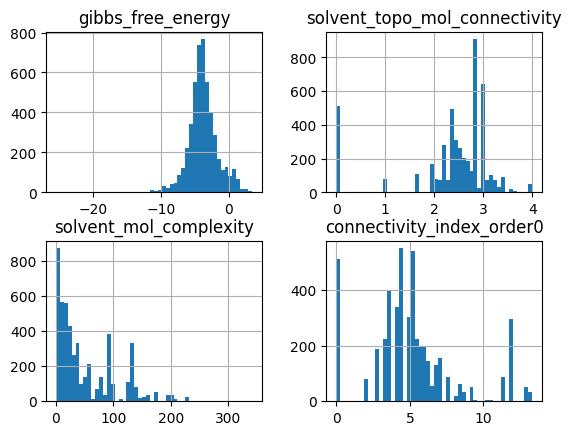

In [103]:
X_train[X_train.columns[:4]].hist(bins=50)

array([[<Axes: title={'center': 'gibbs_free_energy'}>,
        <Axes: title={'center': 'solvent_topo_mol_connectivity'}>],
       [<Axes: title={'center': 'solvent_mol_complexity'}>,
        <Axes: title={'center': 'connectivity_index_order0'}>]],
      dtype=object)

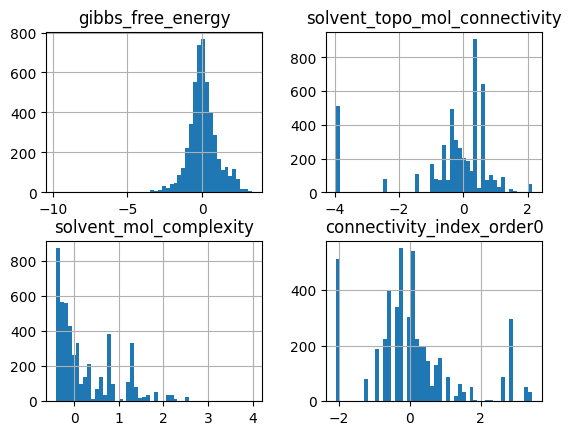

In [104]:
X_train_scaled[X_train_scaled.columns[:4]].hist(bins=50)

In [105]:
#split the testing set into validation and final test sets, each comprising 50% of the original testing data
X_val, X_final_test, y_val, y_final_test = train_test_split(X_test_scaled, y_test, test_size=0.50, random_state=42)

#### Linear regression model

In [106]:
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
lin_reg_model = linear_model.LinearRegression() #create the lin_reg_model object

lin_reg_model.fit(X_train_scaled, y_train) #train on the scaled train set and the predicted y set

LinearRegression()

In [108]:
#predictions of the validation set
y_pred_linreg = lin_reg_model.predict(X_val)

# model evaluation
print("Mean squared error of the model on the validation set : {MSE}" .format(MSE= mean_squared_error(y_val, y_pred_linreg)))
print("Coefficient of determination (R-squared) on the validation set:{r2}".format (r2=r2_score(y_val, y_pred_linreg)))

MSE= mean_squared_error(y_val, y_pred_linreg)
r2=r2_score(y_val, y_pred_linreg)

Mean squared error of the model on the validation set : 2.359238374462492e-25
Coefficient of determination (R-squared) on the validation set:1.0


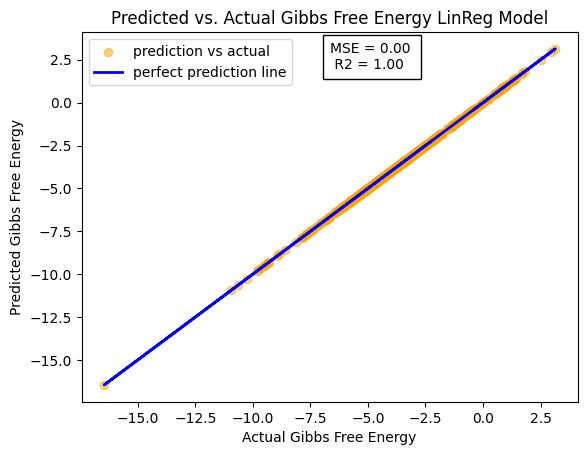

In [109]:
plt.scatter(y_val, y_pred_linreg, color='orange', alpha=0.5, label='prediction vs actual')  # Scatter plot of actual vs. predicted
plt.plot(y_val, y_val, color='blue', linewidth=2, label='perfect prediction line')  # Identity line (perfect prediction)

plt.xlabel('Actual Gibbs Free Energy')
plt.ylabel('Predicted Gibbs Free Energy')
plt.title('Predicted vs. Actual Gibbs Free Energy LinReg Model')
plt.text(0.5, 0.9, f'MSE = {MSE:.2f} \n R2 = {r2:.2f}' ,

         transform=plt.gca().transAxes,

        bbox={'facecolor': 'white', 'edgecolor': 'black', 'pad': 5})
plt.legend()
plt.show()

#### Support Vector Machine

In [110]:
from sklearn.svm import SVR

In [111]:
#For the SVM model, utilize the radial basis function (rbf) kernel with a regularization parameter (C) of 10

reg_svm = SVR(kernel='rbf', C=10) #create reg_svm class. 

reg_svm.fit(X_train_scaled, y_train) #train on the scaled train set and the predicted y set

SVR(C=10)

In [112]:
y_pred_svm = reg_svm.predict(X_val)

# model evaluation
print("Accuracy on training set: {:.3f}".format(reg_svm.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(reg_svm.score(X_val, y_val)))

Accuracy on training set: 0.676
Accuracy on test set: 0.635


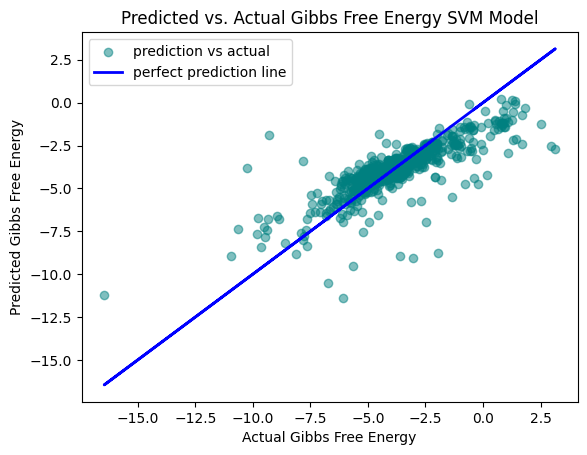

In [113]:
plt.scatter(y_val, y_pred_svm, color='teal', alpha=0.5, label='prediction vs actual')  # Scatter plot of actual vs. predicted
plt.plot(y_val, y_val, color='blue', linewidth=2, label='perfect prediction line')  # Identity line (perfect prediction)

plt.xlabel('Actual Gibbs Free Energy')
plt.ylabel('Predicted Gibbs Free Energy')
plt.title('Predicted vs. Actual Gibbs Free Energy SVM Model')
plt.legend()
plt.show()

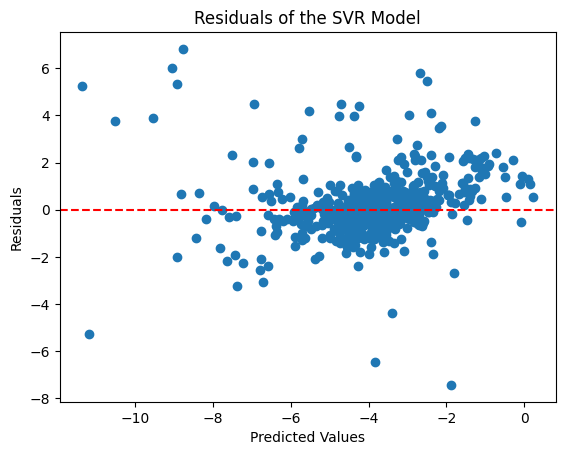

In [114]:
# Calculate residuals
residuals = y_val - y_pred_svm

# Plot residuals
plt.scatter(y_pred_svm, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of the SVR Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Random Forest
-  For the RF model, configure the following hyperparameters: 250 trees, a minimum of 2 samples required to split an internal node, a minimum of 1 sample required to be at a leaf node, the square root of the total number of features as the maximum number of features considered for splitting a node, and disable bootstrapping.

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf_model = RandomForestRegressor(
    n_estimators=250,      # 250 trees
    min_samples_split=2,   # Minimum 2 samples required to split a node
    min_samples_leaf=1,    # Minimum 1 sample required at a leaf node
    max_features='sqrt',   # Square root of the total number of features
    bootstrap=False,       # Disable bootstrapping
    random_state=42        # For reproducibility
)

rf_model.fit(X_train_scaled, y_train)  # Train the model

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=250,
                      random_state=42)

In [117]:
y_pred_rf = rf_model.predict(X_val)    # Predict on validation set

In [118]:
# model evaluation
print("Mean squared error of the model on the validation set : {MSE}" .format(MSE= mean_squared_error(y_val, y_pred_linreg)))
print("Coefficient of determination (R-squared) on the validation set:{r2}".format (r2=r2_score(y_val, y_pred_linreg)))

MSE= mean_squared_error(y_val, y_pred_rf)
r2=r2_score(y_val, y_pred_rf)

Mean squared error of the model on the validation set : 2.359238374462492e-25
Coefficient of determination (R-squared) on the validation set:1.0


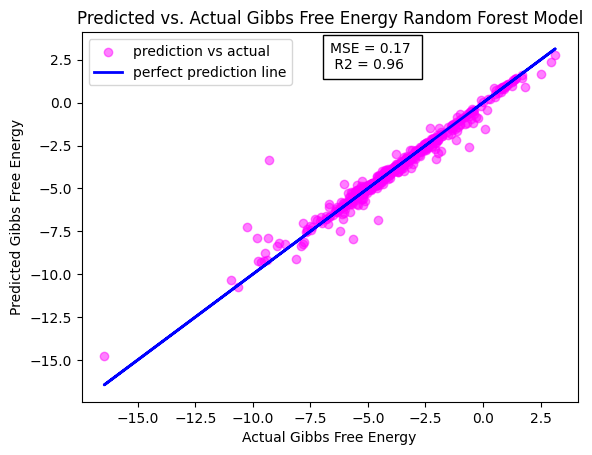

In [119]:
plt.scatter(y_val, y_pred_rf, color='magenta', alpha=0.5, label='prediction vs actual')  
plt.plot(y_val, y_val, color='blue', linewidth=2, label='perfect prediction line')

plt.xlabel('Actual Gibbs Free Energy')
plt.ylabel('Predicted Gibbs Free Energy')
plt.title('Predicted vs. Actual Gibbs Free Energy Random Forest Model')
plt.text(0.5, 0.9, f'MSE = {MSE:.2f} \n R2 = {r2:.2f}' ,

         transform=plt.gca().transAxes,

        bbox={'facecolor': 'white', 'edgecolor': 'black', 'pad': 5})
plt.legend()
plt.show()

**Question 3** Model Evaluation. Your code should output a .csv file that has the following columns:

```algorithm```

```test_score```

```mean absolute error```

 ```standard deviaiton of mean absolute errors```
(calculated using 10-fold cross on the validation dataset.)


You will have the three performance metrics for each of your three algorithms in your ```output.csv``` file. Also plot these three metrics for your algorithms in one bar plot. **(20 points)**

**Question 4** Calculate the feature importance for all three models. Note that for non-linear models, simply using coefficients does not provide an accurate estimate of feature importance.  Permutation feature importance is generally recommended in such cases. For consistency, use permutation feature importance for all three models.

1. Remove any negative and zero importance features and see what happens to MAE and the standard deviation of MAE in the cross_val scores. **(10 points)**

2. Make a bar plot of the top 10 features. Use only the top features and see what happens to MAE and the standard deviation of MAE in the cross_val scores.**(10 points)**

**Question 5** Visualize the performance of your model in 4.1 on the entire dataset by plotting the predicted ΔG on the y-axis and the experimental ΔG on the x-axis. Color the data points based on the solvent group type. **(5 points)**

**Question 6** Summarize your work and discuss what you learnt. **(5 points)**